## Исследование объявлений о продаже квартир — анализ рынка недвижимости

**Описание проекта**


В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя. 


**Наша задача** — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

**Описание данных**

- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
- *balcony* — число балконов
- *ceiling_height* — высота потолков (м)
- *cityCenters_nearest* — расстояние до центра города (м)
- *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
- *first_day_exposition* — дата публикации
- *floor* — этаж
- *floors_total* — всего этажей в доме
- *is_apartment* — апартаменты (булев тип)
- *kitchen_area* — площадь кухни в квадратных метрах (м²)
- *last_price* — цена на момент снятия с публикации
- *living_area* — жилая площадь в квадратных метрах(м²)
- *locality_name* — название населённого пункта
- *open_plan* — свободная планировка (булев тип)
- *parks_around3000* — число парков в радиусе 3 км
- *parks_nearest* — расстояние до ближайшего парка (м)
- *ponds_around3000* — число водоёмов в радиусе 3 км
- *ponds_nearest* — расстояние до ближайшего водоёма (м)
- *rooms* — число комнат
- *studio* — квартира-студия (булев тип)
- *total_area* — площадь квартиры в квадратных метрах (м²)
- *total_images* — число фотографий квартиры в объявлении

Загрузим и изучим наши данные.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

try:
    data = pd.read_csv('real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

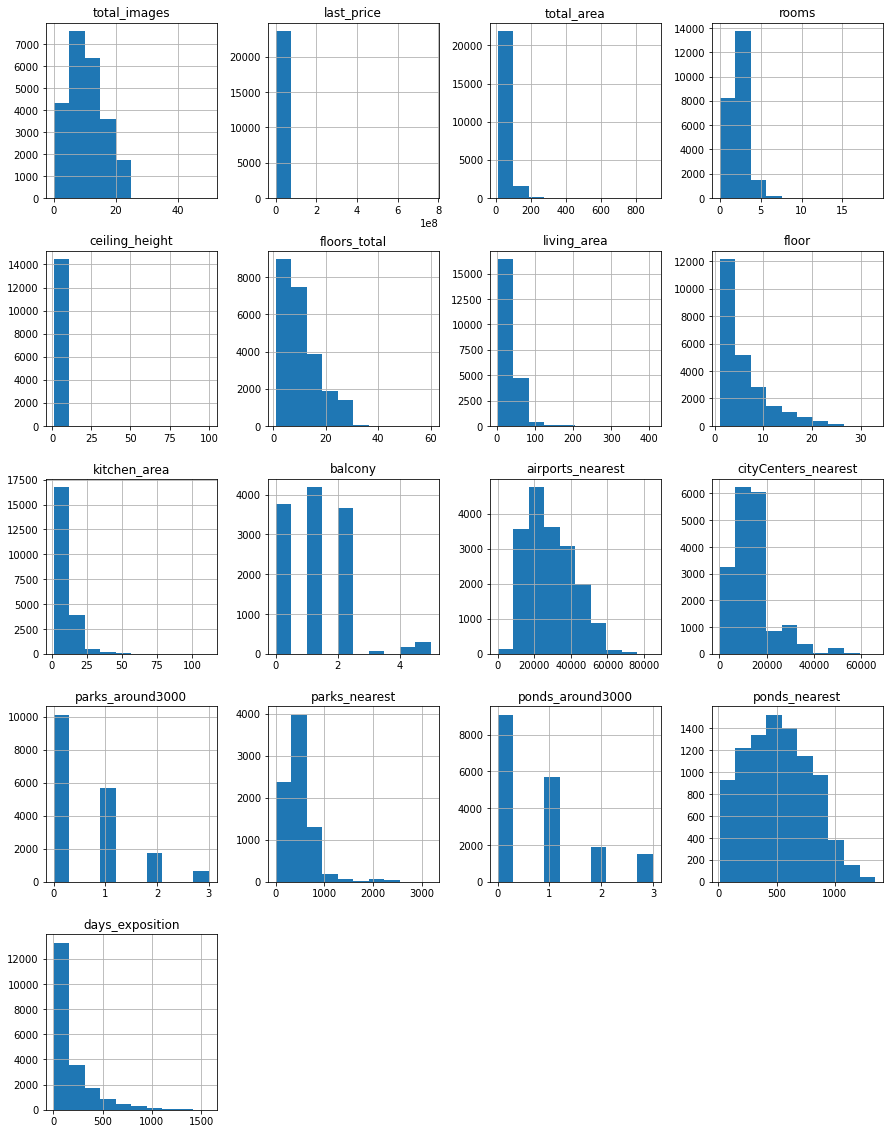

In [4]:
data.hist(figsize=(15, 20))

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Работа с пропусками**

Итак, мы видим, что у нас дотаточно много пропущенных значений. Начнем разбираться по порядку и попробуем заполнить их там, где это возможно.
- **balcony** - здесь могу предположить, что пропуск в этом столбце означает отсутствие балкона, поэтому просто проставляем 0 и идем дальше.

In [6]:
data['balcony'] = data['balcony'].fillna(0)

- **is_apartment** - пропуск в этом столбце, скорее всего, связан с тем, что не все знают, в чем разница между аппартаментами и квартирой: аппартаменты являются нежилой недвижимостью, но в них можно жить, т.к. по характеристикам и удобствам они практически не уступают квартирам. Но в аппартаментах нельзя получить постоянную регистрацию. Можно предположить, что пропущенные значения - это квартиры, поскольку люди продающие (и покупающие) аппартаменты, знают точно, с чем имеют дело, и с наибольшей вероятностью указывают эту информацию сразу.

In [7]:
data['is_apartment'] = data['is_apartment'].fillna(False)

- Пропуски в столбцах **locality_name**, **floors_total**, скорее всего, вызваны человеческой ошибкой, но таких значений очень мало (меньше 1% от общей массы), поэтому их можно просто отбросить.

In [8]:
data = data.dropna(subset = ["floors_total", "locality_name"])

Посмотрим, что осталось.

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

- Пропуски в столбцах **airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest** могут быть вызваны как человеческим фактором (человек, который продает квартиру, не знает сколько у него рядом с домом парков, или как далеко находится аэропорт), так и банальным отсутствием того или иного объекта поблизости (пруда, парка, центра города (если это деревня) и так далее). Заполнять пропуски в этих столбцах нулями или медианными значениями будет некорректно, поэтому оставляем все как есть.

- **days_exposition** - пропуски в этом столбце говорит о том, что либо квартира еще продается, либо ее забыли снять с продажи, поэтому пока оставляем все, как есть.

- Пропуски в столбцах **ceiling_height, living_area, kitchen_area** также связаны либо с отсутствием информации о помещении, либо с человеческим фактором. Их заполнение носит более сложный характер, возможно, мы сможем что-то с ними сделать, после предобработки данных.

Узнаем, какие типы данных в столбцах.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [11]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Переведем формат данных в столбцах **last_price, floors_total, balcony** из float в int, т.к. цена нас не интересует с точностью до цента, а кол-во балконов и этажей должны быть кратные единице по определению.

In [12]:
data[['last_price', 'floors_total', 'balcony']] = data[['last_price', 'floors_total', 'balcony']].astype('int64')

Переведем формат стоблца **first_day_exposition** в "datetime", чтобы Pandas не воспринимал данные за строки или числа, и округлим формат до 1-го дня, т.к. точное время продажи нас особо не интересует:

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1D')

In [14]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Удаление неявных дубликатов**

Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты. Здесь нас интересуют названия населенных пунктов **locality_name**.

In [15]:
sorted_data = data.sort_values(by='locality_name')
sorted_data['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [16]:
len(data['locality_name'].unique())

364

Исправим неявные дубликаты.

In [17]:
data['locality_name'] = data['locality_name'].str.replace("ё", "е")
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].str.replace('поселок Мурино', 'Мурино')

In [18]:
len(data['locality_name'].unique())

319

In [19]:
data.duplicated().sum()

0

Найдём и устраним редкие и выбивающиеся значения. Начнем с **ceiling_height** - смею предположить, что бывают квартиры с высотой потолков до 10м, но все что выше - явная ошибка при заполнении (например, вместо 32м должно было быть 3.2м).

In [20]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height']*0.1
data.query('ceiling_height > 10 or ceiling_height < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000,42.8,2017-08-14,2,1.20,2,27.5,1,False,...,5.20,0,поселок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
15061,19,5600000,56.4,2018-05-11,2,1.40,14,32.4,5,False,...,9.10,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
16934,5,4100000,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22309,20,5300000,45.0,2017-09-30,1,1.03,16,15.5,15,False,...,NaN,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22590,16,6000000,55.0,2018-10-31,2,1.00,12,32.4,7,False,...,10.00,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


Теперь отбросим все квартиры, где высота потолка  меньше 2м, т.к. таких квартир не бывает.

In [21]:
data = data.drop(data.index[data['ceiling_height'] < 2])
data['ceiling_height'].isna().sum()

9084

И теперь заполним пропуски в этом столбце медианным значением для каждой группы населенных пунктов.

In [23]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('locality_name')['ceiling_height'].transform('median'))
data['ceiling_height'].isna().sum()

99

Мы видим, что у нас осталось 99 пустых строк, поэтому просто удалим их.

In [24]:
data = data.dropna(subset = ['ceiling_height'])
data['ceiling_height'].isna().sum()

0

Квартиры, с жилой площадью меньше 16м2, либо же кухней меньше 4м2, либо же жилой площадью меньше 6м2 кажутся мне неправдоподобными. Также, мне кажутся неправдоподобными объявления, где цена ниже 100 тысяч рублей. Узнаем их кол-во и если их будет немного - избавимся от них.

In [25]:
data.query('total_area < 16 or kitchen_area < 4 or living_area < 6 or last_price <= 100000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
906,15,2600000,27.00,2017-07-10,1,2.75,23,18.0,18,False,...,2.00,0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
2165,15,3180000,25.00,2019-03-21,1,2.50,25,17.0,17,False,...,3.00,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,19.0
3078,17,6000000,43.00,2018-11-12,2,2.90,4,29.3,2,False,...,3.20,0,Санкт-Петербург,22357.0,5247.0,1.0,319.0,2.0,831.0,37.0
3195,17,2690000,25.60,2018-02-19,1,2.50,9,16.2,7,False,...,3.80,0,Санкт-Петербург,11033.0,11281.0,0.0,NaN,1.0,283.0,99.0
3242,7,4440000,41.00,2017-07-02,1,2.70,17,3.0,17,False,...,11.00,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
6084,6,770000,18.00,2017-10-16,1,2.60,5,13.0,4,False,...,3.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,90.0
6262,9,3100000,24.00,2018-06-25,2,3.00,5,16.0,5,False,...,2.00,0,Санкт-Петербург,31960.0,4914.0,2.0,426.0,1.0,936.0,54.0
7047,9,2800000,21.00,2017-09-23,1,2.70,5,14.9,3,False,...,3.80,0,Санкт-Петербург,19676.0,3974.0,0.0,NaN,3.0,518.0,108.0
7950,3,5967734,66.40,2017-02-07,2,2.70,4,44.4,2,False,...,2.89,0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,0.0,NaN,335.0
8712,6,14948000,42.70,2017-09-15,2,2.80,4,27.5,4,False,...,3.70,0,Санкт-Петербург,25212.0,3914.0,1.0,290.0,1.0,860.0,167.0


In [26]:
data = data.drop(data.index[data['total_area'] < 16])
data = data.drop(data.index[data['kitchen_area'] < 4])
data = data.drop(data.index[data['living_area'] < 6])
data = data.drop(data.index[data['last_price'] < 1000000])
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1802
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2146
balcony                     0
locality_name               0
airports_nearest         5227
cityCenters_nearest      5204
parks_around3000         5203
parks_nearest           15210
ponds_around3000         5203
ponds_nearest           14215
days_exposition          3108
dtype: int64

Обновим нумерацию строк и продолжим.

In [27]:
data.reset_index(drop = True, inplace = True)

**Добавление новых данных в таблицу**

Итак, приступим к следующим шагам и добавим в нашу таблицу:

1. цену квадратного метра;
2. день недели, месяц и год публикации объявления;
3. этаж квартиры (варианты — первый, последний, другой);
4. расстояние до центра города в километрах.

Для начала, для каждого объявления узнаем, сколько стоит 1 кв.м. квартиры, и добавим в таблицу.

In [28]:
data['price_for_m2'] = data['last_price'] // data['total_area']

Добавим день, месяц и год публикации объявления. Дни недели будут пронумерованы:

- 0 = понедельник
- 1 = вторник
- 2 = среда
- 3 = четверг
- 4 = пятница
- 5 = суббота
- 6 = воскресенье

In [29]:
data['day'] = data.first_day_exposition.dt.weekday
data['month'] = data.first_day_exposition.dt.month
data['year'] = data.first_day_exposition.dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,day,month,year
0,20,13000000,108.0,2019-03-07,3,2.700,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.615,11,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.0,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.700,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.0,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.700,14,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.030,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018


Добавим тип этажа квартиры.

In [30]:
data['floor_level'] = data['floor']
data['floor_level'] = data['floor_level'].where(data['floor_level'] != 1, other='Первый')
data['floor_level'] = data['floor_level'].where(data['floor_level'] != data['floors_total'], other='Последний')
data['floor_level'] = data['floor_level'].where((data['floor_level'] == 'Первый') | (data['floor_level'] == 'Последний'), other='Другой')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,day,month,year,floor_level
0,20,13000000,108.00,2019-03-07,3,2.700,16,51.00,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019,Другой
1,7,3350000,40.40,2018-12-04,1,2.615,11,18.60,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.0,1,12,2018,Первый
2,10,5196000,56.00,2015-08-20,2,2.700,5,34.30,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.0,3,8,2015,Другой
3,0,64900000,159.00,2015-07-24,3,2.700,14,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.0,4,7,2015,Другой
4,2,10000000,100.00,2018-06-19,2,3.030,14,32.00,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,Другой
5,10,2890000,30.40,2018-09-10,1,2.650,12,14.40,5,False,...,NaN,NaN,NaN,NaN,55.0,95065.0,0,9,2018,Другой
6,6,3700000,37.30,2017-11-02,1,2.640,26,10.60,6,False,...,0.0,NaN,0.0,NaN,155.0,99195.0,3,11,2017,Другой
7,5,7915000,71.60,2019-04-18,2,2.700,24,NaN,22,False,...,0.0,NaN,0.0,NaN,NaN,110544.0,3,4,2019,Другой
8,20,2900000,33.16,2018-05-23,1,2.700,27,15.43,26,False,...,NaN,NaN,NaN,NaN,189.0,87454.0,2,5,2018,Другой
9,18,5400000,61.00,2017-02-26,3,2.500,9,43.60,7,False,...,0.0,NaN,0.0,NaN,289.0,88524.0,6,2,2017,Другой


In [31]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']*0.001
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round(0)
data['cityCenters_nearest_km']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23222    34.0
23223     4.0
23224     NaN
23225    10.0
23226     NaN
Name: cityCenters_nearest_km, Length: 23227, dtype: float64

Далее, изучим следующие параметры объектов и построим гистограммы для каждого из них:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

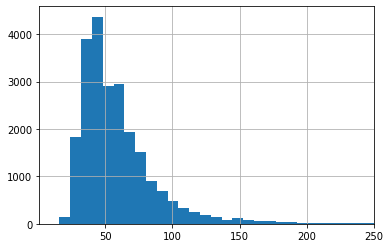

In [32]:
data['total_area'].hist(bins = 110)
plt.xlim(1, 250)
plt.show()

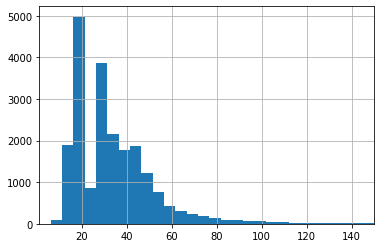

In [33]:
data['living_area'].hist(bins = 80)
plt.xlim(1, 150)
plt.show()

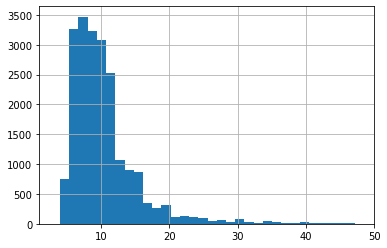

In [34]:
data['kitchen_area'].hist(bins = 80)
plt.xlim(1, 50)
plt.show()

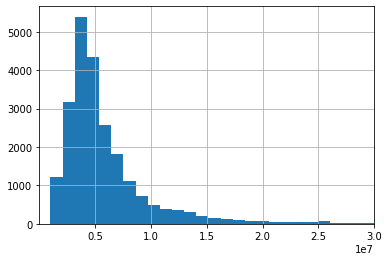

In [35]:
data['last_price'].hist(bins = 700)
plt.xlim(1, 30000000)
plt.show()

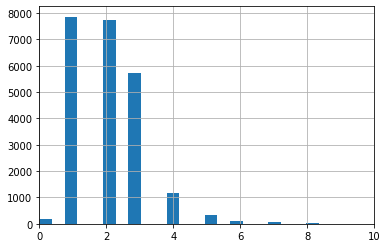

In [36]:
data['rooms'].hist(bins = 50)
plt.xlim(0, 10)
plt.show()

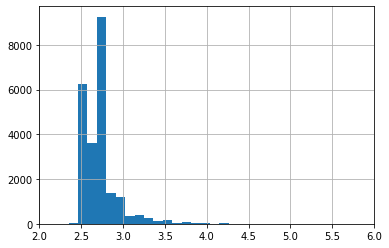

In [37]:
data['ceiling_height'].hist(bins = 80)
plt.xlim(2, 6)
plt.show()

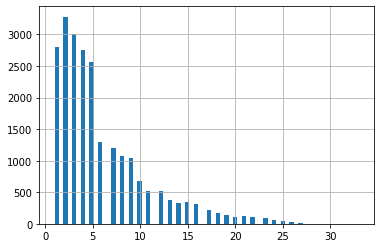

In [38]:
data['floor'].hist(bins = 70)
plt.show()

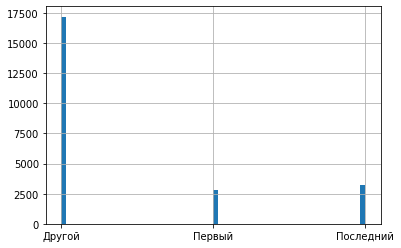

In [39]:
data['floor_level'].hist(bins = 60)
plt.show()

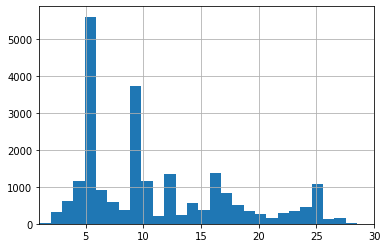

In [40]:
data['floors_total'].hist(bins = 60)
plt.xlim(1, 30)
plt.show()

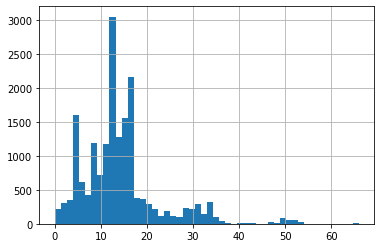

In [41]:
data['cityCenters_nearest_km'].hist(bins = 50)
plt.show()

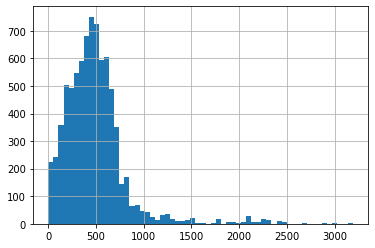

In [42]:
data['parks_nearest'].hist(bins = 60)
plt.show()

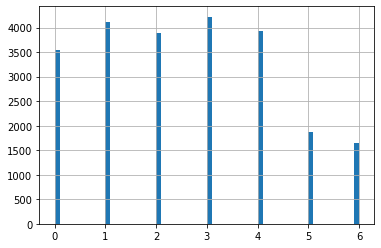

In [43]:
data['day'].hist(bins = 60)
plt.show()

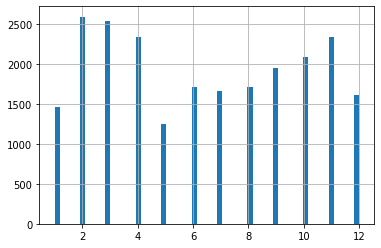

In [44]:
data['month'].hist(bins = 60)
# plt.xlim(1, 60)
plt.show()

Практически на всех графиках мы наблюдаем распределение Пуассона, что является весьма правдоподобным:
1. чаще всего продаются квартиры площадью в среднем 50 м2;
2. большинство квартир продаются в районе 4 млн. рублей (распределение больше похоже на нормальное);
3. большинство квартир имеют потолки от 2.5 до 2.7 м2;
4. чаще всего продаются квартиры на втором и третьем этаже и либо в пятиэтажках, либо девятиэтажках;
5. чаще всего продаются двухкомантные и однокомнатные квартиры;
6. большинство квартир удалены от центра города на 11-12км, а ближайшие парки чаще всего находятся в 500 метрах;
7. чаще всего квартиры выставляют на продажу по вторникам и четвергам;
8. пик объявлений приходится на февраль-март (после спада в декабре-январе), затем идет резкий спад в мае, с последующим нарастающим ростом вплоть до ноября;
9. Размер кухни чаще всего составляет 7-8 м2, а вот по жилой площади у нас два разных пика - чаще всего в квартирах жилая площадь составляет либо 18-20 м2, либо 26-30 м2 (судя по всему, первый пик - это однушки, второй пик - двушки).

Изучим, как быстро продавались квартиры (столбец **days_exposition**). Посчитаем среднее и медиану.

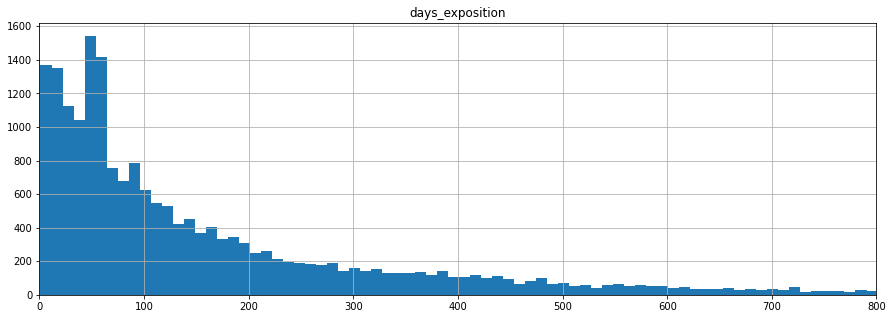

In [45]:
data['days_exposition'].hist(bins = 150, figsize = (15,5))
plt.title('days_exposition')
plt.xlim(0, 800)
plt.show()

In [46]:
data['days_exposition'].mean()

181.26378050598936

In [47]:
data['days_exposition'].median()

95.0

**Вывод**:

Судя по полученным данным, мы можем сделать вывод, что большинство квартир продаются через 50-60 дней, второй пик продаж приходится на первые 20 дней после публикации. При этом среднее время продажи квартир составляет 181 день (примерно полгода), но есть довольно большое кол-во квартир, которые были в продаже больше одного года (вплоть до 5 лет).

**Корреляция цен**

Далее, изучим зависит ли цена квартиры от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Построим графики, которые покажут зависимость цены от указанных выше параметров.

,total_area,living_area,kitchen_area,rooms,last_price
total_area,1.000000,0.940334,0.608091,0.758511,0.653070
living_area,0.940334,1.000000,0.428216,0.846377,0.566865
kitchen_area,0.608091,0.428216,1.000000,0.269156,0.519770
rooms,0.758511,0.846377,0.269156,1.000000,0.362875
last_price,0.653070,0.566865,0.519770,0.362875,1.000000


array([[<AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='total_area'>],
       [<AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='living_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='living_area'>],
       [<AxesSubplot:xlabel='total_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>],
       [<AxesSubplot:xlabel=

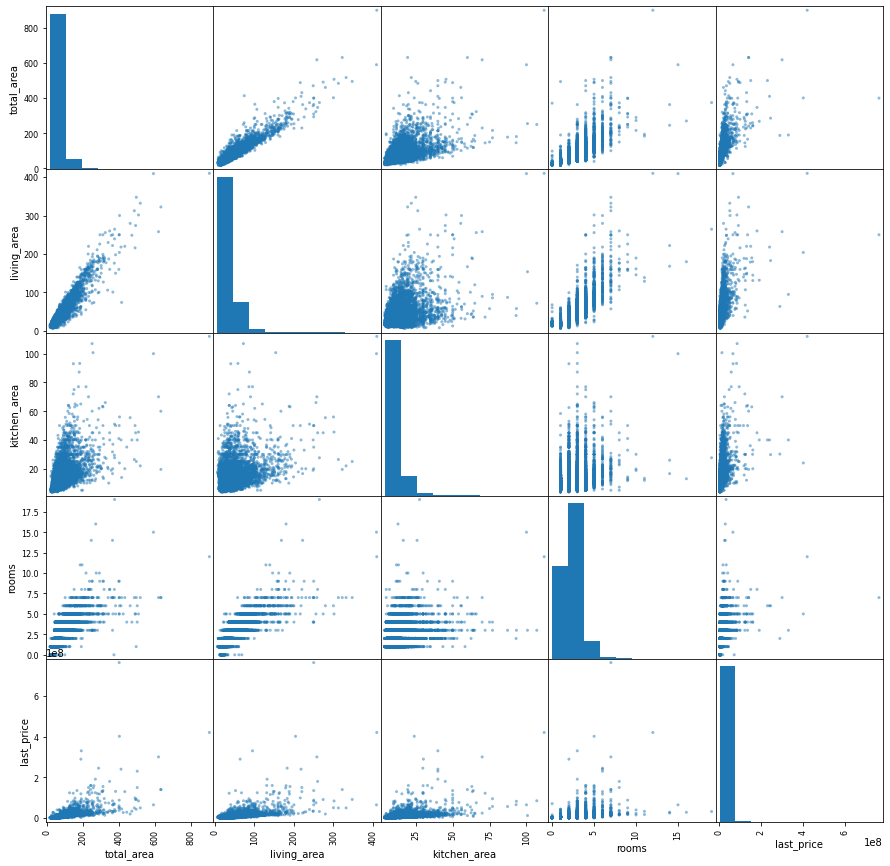

In [48]:
display(data[['total_area', 'living_area', 'kitchen_area', 'rooms', 'last_price']].corr())
pd.plotting.scatter_matrix(data[['total_area', 'living_area', 'kitchen_area', 'rooms', 'last_price']], figsize=(15,15))

По полученным графикам и данным выше, можем сделать вывод, что цена больше всего зависит от общей площади квартиры (коэффициент Пирсона равен 0.65), и уже потом от ее жилой площади. Корреляция цены от размера кухни еще слабее.

<AxesSubplot:xlabel='rooms'>

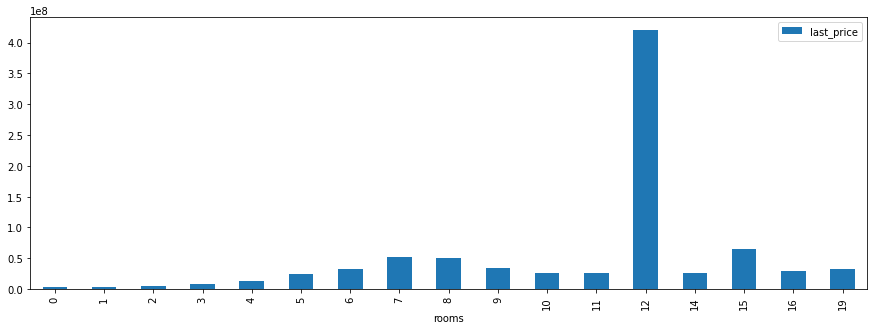

In [49]:
#data.plot(x='rooms', y='last_price', kind='hist', figsize = (15,5))
data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean').plot(y = 'last_price', kind = 'bar', figsize = (15,5))

На графике выше мы видим, что цена растет при увеличении комнат от однокомнатных квартир вплоть до восьмикомнатных, а далее, наоборот, идет плавный спад средней цены до 11-комнатных квартир, а затем мы видим огромный пик на цену 12-коматных квартир.

<AxesSubplot:xlabel='floor_level'>

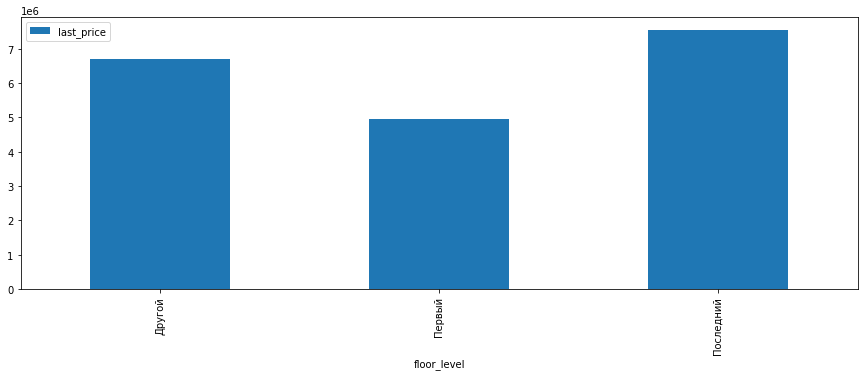

In [50]:
data.pivot_table(index = 'floor_level', values = 'last_price', aggfunc = 'mean').plot(y = 'last_price', kind = 'bar', figsize = (15,5))

На графике выше мы видим, что квартиры на первом этаже обычно дешевле остальных, а квартиры на самом последнем этаже - дороже, что похоже на реальность.

,day,month,year,last_price
day,1.000000,0.013006,-0.002730,0.002437
month,0.013006,1.000000,-0.271487,0.001813
year,-0.002730,-0.271487,1.000000,-0.041113
last_price,0.002437,0.001813,-0.041113,1.000000


<AxesSubplot:xlabel='year'>

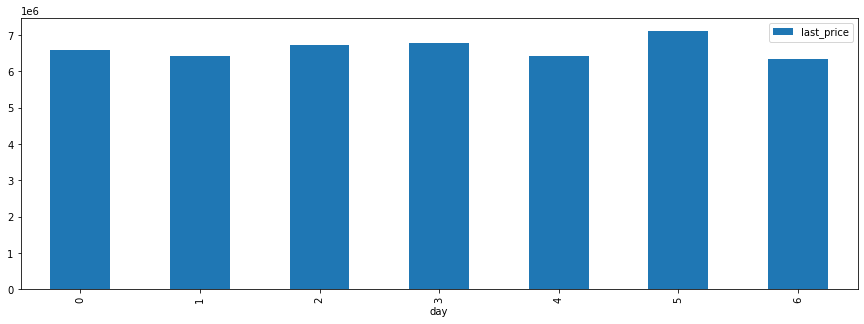

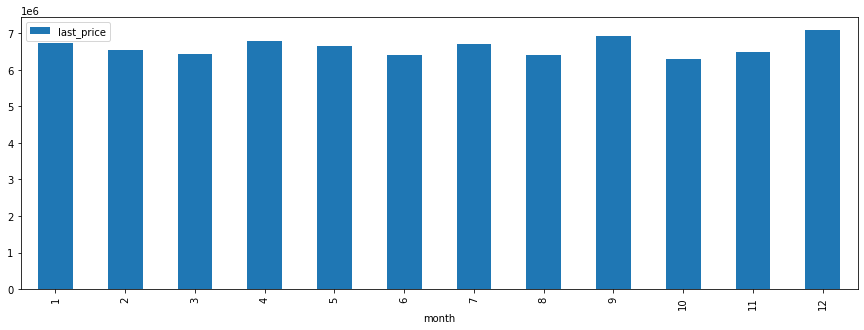

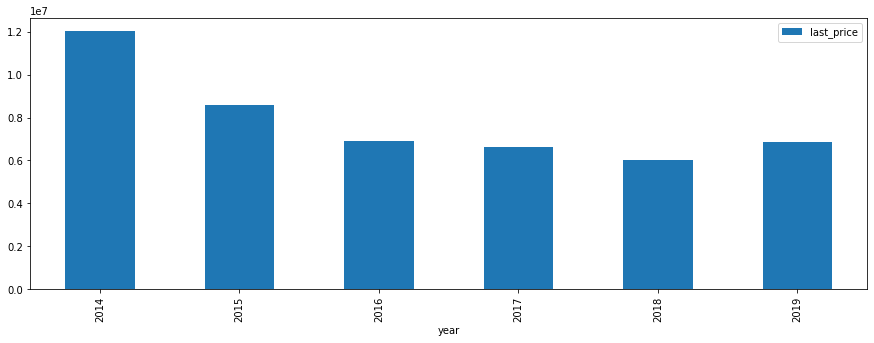

In [51]:
display(data[['day', 'month', 'year', 'last_price']].corr())
#pd.plotting.scatter_matrix(data[['day', 'month', 'year', 'last_price']], figsize=(15,15))
data.pivot_table(index = 'day', values = 'last_price', aggfunc = 'mean').plot(y = 'last_price', kind = 'bar', figsize = (15,5))
data.pivot_table(index = 'month', values = 'last_price', aggfunc = 'mean').plot(y = 'last_price', kind = 'bar', figsize = (15,5))
data.pivot_table(index = 'year', values = 'last_price', aggfunc = 'mean').plot(y = 'last_price', kind = 'bar', figsize = (15,5))


По данным выше, можем сделать вывод, что цена никак не зависит от даты размещения объявления, нет абсолютно никакой корреляции. Единственное, что мы можем отметить, что раньше квартиры продавались дороже - начиная с 2014 года и вплоть до 2018 средняя цена продажи только уменьшалась.

**Средняя цена в 10 самых крупных городах**

Теперь, отберём 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в каждом, затем 

In [53]:
data_top10 = data.pivot_table(index='locality_name', values = 'price_for_m2', aggfunc = ['count', 'mean'])
data_top10.columns = ('count', 'mean')
data_top10.sort_values('count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15617,114815.370494
Мурино,583,85946.130360
Кудрово,470,95260.380851
поселок Шушары,439,78550.881549
Всеволожск,397,68718.821159
Пушкин,368,103080.695652
Колпино,338,75424.147929
поселок Парголово,327,90175.486239
Гатчина,306,68934.741830


По таблице выше, мы видим, что в Санкт-Петербурге самое большое кол-во объявлений и самая большая цена за 1 кв м, чуть ниже цена за кв м в Пушкине. А самая низкая цена за 1 кв м оказалась в Выборге.

**Цены на жилье в Санкт-Петербурге**

Теперь исследуем цены на жилье в Санкт-Петербурге в зависимости от удаленности от центра.

In [54]:
saint_p = data.query('locality_name == "Санкт-Петербург"')

<AxesSubplot:xlabel='cityCenters_nearest_km'>

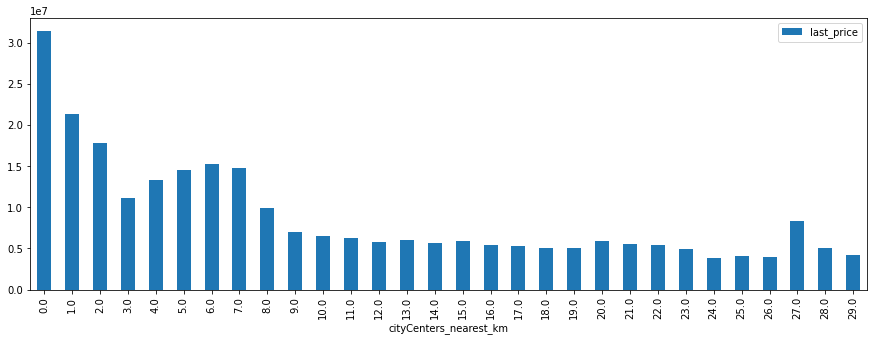

In [55]:
saint_p_pivot = saint_p.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'mean')
saint_p_pivot.astype('int')
saint_p_pivot.plot(y = 'last_price', style = 'o', kind = 'bar', figsize = (15,5))

По графику выше мы можем наблюдать некоторые интересные особенности:
- самые дорогие квартиры находятся в самом центре, либо на удаленности 1км от него;
- квартиры на расстояннии 3км от центра гораздо дешевле, чем квартиры 0-2км от центра, а также квартры на расстоянии 4-7км от центра. Мы можем наблюдать увеличение цены, двигаясь по графику от 3км и до 6-7км от центра, и затем снова резкое падение при переходе к 9 км от центра. Мы можем предположить, что пик цен на 6 км от центра связан с дорогим жильем в районе Крестовского Острова;
- Мы видим еще один скачок цен в 27км от центра и затем снова снижение по мере удаления. Скорее всего, это связанно с тем, что эти квартиры были проданы по факту в Пушкине (Пушкин это город в составе Петербурга, и он как раз находится примерно 27км от центра Петербурга).

## Общий вывод

В предоставленных данных было довольно много выбросов, дубликатов и пропусков, однако, после обработки информации мы можем сделать следующие выводы:

1. Цена в первую очередь зависит от общей площади квартиры (коэффициент Пирсона равен 0.65).
2. Цена на жилье в Санкт-Петербурге будет самой большой в самом центре города, однако, на удаленности 6-7 км от центра цены также возврастают. При этом наибольшей популярностью пользуются квартиры на расстоянии 11-12км от центра.
3. Наибольшей популярностью польщуются однокомнатные и двухкомнатные квартиры.
4. Чаще всего квартиры покупают в пятиэтажных и девятиэтажных домах.
5. Средняя цена проданных квартир - 4 млн рублей, и средняя площадь - 40-50 кв м.
6. Чаще всего, квартиры продаются либо в течение первых 20 дней после публикации, либо через 50-60 дней после публикации. Среднее время продажи квартиры составляет чуть больше 3-х месяцев с момента публикации.
7. Стоит обратить внимание на большое кол-во пропусков в исходных данных - особенно в столбцах *living_area, ceiling_height и kitchen_area*, найти причины их образования и составить план по их устранению.